In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [ ]:
# (a) i. for penguin dataset, convert island, and sex into numerical format

# Load the datasets into python
penguins_1 = pd.read_csv('sample_data/penguins.csv')

enc = OneHotEncoder()
island = enc.fit_transform(penguins_1[["island"]])
sex = enc.fit_transform(penguins_1[["sex"]])
penguins_1[["island"]] = island
penguins_1[["sex"]] = sex

# (a) ii. convert island and sex to categories

# Load the datasets into python
penguins_2 = pd.read_csv('sample_data/penguins.csv')

# change Torgersen to 0, Biscoe to 1, Dream to 2
penguins_2 = np.array(penguins_2)

for i in range(penguins_2[:,1].size):
  if penguins_2[:,1][i] == "Torgersen":
    penguins_2[:,1][i] = 0
  elif penguins_2[:,1][i] == "Biscoe":
    penguins_2[:,1][i] = 1
  else:
     penguins_2[:,1][i] = 2

# change FEMALE to 0 and MALE to 1
for i in range(penguins_2[:,6].size):
  if penguins_2[:,6][i] == "FEMALE":
    penguins_2[:,6][i] = 0
  elif penguins_2[:,6][i] == "MALE":
    penguins_2[:,6][i] = 1


In [ ]:
# (b) i. for abalone dataset, convert Type into numerical format

# Load the datasets into python
abalone_1 = pd.read_csv('sample_data/abalone.csv')

enc = OneHotEncoder()
type_abalone = enc.fit_transform(abalone_1[["Type"]])
abalone_1[["Type"]] = type_abalone


# (b) ii. for abalone dataset, convert Type to categories

# Load the datasets into python
abalone_2 = pd.read_csv('sample_data/abalone.csv')

# change F to 0, M to 1, I to 2
abalone_2 = np.array(abalone_2)

for i in range(abalone_2[:,1].size):
  if abalone_2[:,1][i] == "F":
    abalone_2[:,1][i] = 0
  elif abalone_2[:,1][i] == "M":
    abalone_2[:,1][i] = 1
  else:
     abalone_2[:,1][i] = 2

## 2

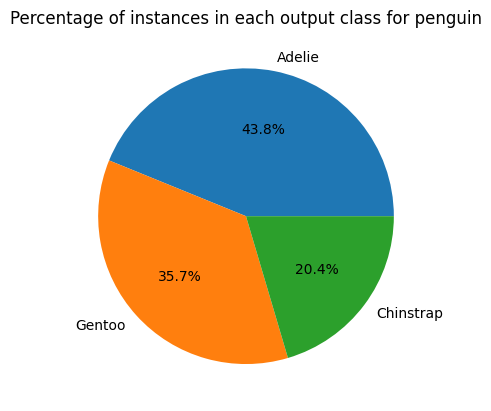

In [ ]:
# Plot percentage of instances in each species for penguins
output_classes = penguins_1['species'].value_counts()
plt.pie(output_classes, labels=output_classes.index, autopct='%1.1f%%')
plt.title("Percentage of instances in each output class for penguin")
plt.savefig(f'penguin-classes.png') # save as .png file
plt.show()

In [ ]:
#  Plot percentage of instances in each species for abalone
output_classes = abalone_1['Type'].value_counts()
plt.pie(output_classes, labels=output_classes.index, autopct='%1.1f%%')
plt.title("Percentage of instances in each output class for abalone")
plt.savefig(f'abalone-classes.png') # save as .png file
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:990: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  keys, counts = value_counts_arraylike(values, dropna)


## 3

In [ ]:
# Split the penguin dataset into train and test sets
P_X = penguins_2[:, 1:7]
P_y = penguins_2[:, 0]
P_X_train, P_X_test, P_y_train, P_y_test = train_test_split(P_X, P_y, test_size=0.33, random_state=0)

## 4

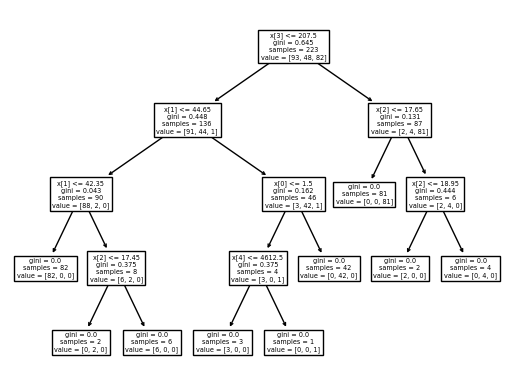

In [ ]:
# (a) Base-DT
basedt_model = tree.DecisionTreeClassifier(random_state=0)
basedt_model = basedt_model.fit(P_X_train, P_y_train)
tree.plot_tree(basedt_model)

with open("penguin-performance.txt", "w") as out:
  out.write("********************* Base-DT Model *********************\n")
  out.write(f"Model name: Base-DT Model\n")
  out.write(f"Hyperparameters (default):\n")
  out.write(f"  criterion: gini\n")
  out.write(f"  max_depth: None\n")
  out.write(f"  min_samples_split: 2\n")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validat

[Text(0.5714285714285714, 0.9, 'x[3] <= 207.5\ngini = 0.645\nsamples = 223\nvalue = [93, 48, 82]'),
 Text(0.35714285714285715, 0.7, 'x[1] <= 44.65\ngini = 0.448\nsamples = 136\nvalue = [91, 44, 1]'),
 Text(0.14285714285714285, 0.5, 'x[1] <= 42.35\ngini = 0.043\nsamples = 90\nvalue = [88, 2, 0]'),
 Text(0.07142857142857142, 0.3, 'gini = 0.0\nsamples = 82\nvalue = [82, 0, 0]'),
 Text(0.21428571428571427, 0.3, 'x[2] <= 17.45\ngini = 0.375\nsamples = 8\nvalue = [6, 2, 0]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.2857142857142857, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.5714285714285714, 0.5, 'x[0] <= 1.5\ngini = 0.162\nsamples = 46\nvalue = [3, 42, 1]'),
 Text(0.5, 0.3, 'x[3] <= 200.0\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6428571428571429, 0.3, 'gini

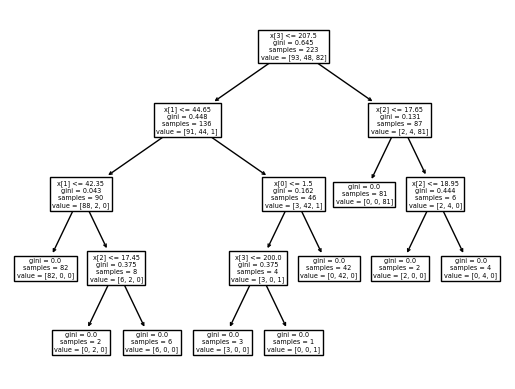

In [ ]:
# (b) Top-DT
parameters = {'criterion': ('gini', 'entropy'), 'max_depth': [1, 5, None], 'min_samples_split': [2, 1, 3]}
topdt_model = GridSearchCV(tree.DecisionTreeClassifier(), parameters)
topdt_model.fit(P_X_train, P_y_train)
tree.plot_tree(topdt_model.best_estimator_)

In [ ]:
# (c) Base-MLP
basemlp_model = MLPClassifier(hidden_layer_sizes=(100, 100, ), activation='logistic', solver='sgd').fit(P_X_train, P_y_train)

In [ ]:
# (d) Top-MLP
parameters = {'activation': ('logistic', 'tanh', 'relu'), 'hidden_layer_sizes': [(30, 50, ), (10, 10, 10, )], 'solver': ['adam', 'sgd']}
topmlp_model = GridSearchCV(MLPClassifier(), parameters)
topmlp_model.fit(P_X_train, P_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ('logistic', 'tanh', 'relu'),
                         'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
                         'solver': ['adam', 'sgd']})